In [10]:
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt
import numpy as np
import pandas_profiling
from pandas_profiling import ProfileReport
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from googletrans import Translator
from sklearn.impute import SimpleImputer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

from imblearn.over_sampling import SMOTE

from xgboost import XGBClassifier
import xgboost as xgb
from xgboost import plot_importance

from catboost import CatBoostClassifier, Pool
from hypopt import GridSearch

from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Dropout, Conv1D, MaxPooling1D, Flatten, Embedding, LSTM, SpatialDropout1D, Input
from keras.layers.merge import Concatenate
from keras.utils import np_utils
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.utils.np_utils import to_categorical
from sklearn.utils import shuffle


import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))


###  Neural Net

In [4]:
# Load cleaned data
df = pd.read_pickle('df_impute.pkl')

# Transform ordinal
## Ordinal2
df.ordinal2 = df.ordinal2.replace(0,1)
df['ordinal2']= ss.boxcox(df.ordinal2, -0.1911)

## Ordinal1
df['ordinal1']= ss.boxcox(df.ordinal1, -1)

# Specify categorical columns
cat_cols = [x for x in df.columns if x not in ['ordinal1', 'ordinal2', 'label']]

# Convert categorical to str
for col in cat_cols:
    df[col]=df[col].astype(str)
    
# Prepare for modeling
X = df.drop(columns = ['label'])
y = [int(x) for x in df.label]

# Create dummies
# Get dummies, append to new dataframe
# One hot encoding
X_dummies = X.copy()

for col in cat_cols:
    X_dummies = pd.concat([X_dummies,pd.get_dummies(X_dummies[col], prefix=col)],axis=1)
    
X_dummies = X_dummies.drop(columns=cat_cols)

# Convert y to integer
y = [int(x) for x in y]

### Test with smaller datasets
X_dummies = X_dummies.head(10000)
y = y[0:10000]

In [5]:
####### Basic Model
# Prepare data
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.33, random_state=0)
input_dim = len(X_train.columns)

# Compile model
model = Sequential()
model.add(Dense(32, input_dim=input_dim, activation='relu', kernel_initializer='normal'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy' , optimizer = 'adam' , metrics=['binary_accuracy'])
model.fit(X_train, y_train, epochs = 20, batch_size = 6)

# Evaluate 
scores = model.evaluate(X_test, y_test)
y_pred_ = model.predict(X_test)
y_pred = [np.round(x)[0] for x in list(y_pred_)]
confusion_matrix(y_test, y_pred)
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))
print('Recall: {}'.format(recall_score(y_test, y_pred)))
print('Precision: {}'.format(precision_score(y_test, y_pred)))

Epoch 1/20
6700/6700 [==============================] - 3s 428us/step - loss: 0.0818 - binary_accuracy: 0.9797 0s - loss: 0.0826 - binary_accuracy: 
Epoch 2/20
6700/6700 [==============================] - 3s 450us/step - loss: 0.0465 - binary_accuracy: 0.9893 1s - loss: 0.0508
Epoch 3/20
6700/6700 [==============================] - 3s 405us/step - loss: 0.0426 - binary_accuracy: 0.9901
Epoch 4/20
6700/6700 [==============================] - 3s 422us/step - loss: 0.0397 - binary_accuracy: 0.9896
Epoch 5/20
6700/6700 [==============================] - 3s 412us/step - loss: 0.0373 - binary_accuracy: 0.9909
Epoch 6/20
6700/6700 [==============================] - 3s 453us/step - loss: 0.0362 - binary_accuracy: 0.9907
Epoch 7/20
6700/6700 [==============================] - 3s 432us/step - loss: 0.0342 - binary_accuracy: 0.9904
Epoch 8/20
6700/6700 [==============================] - 3s 472us/step - loss: 0.0330 - binary_accuracy: 0.9904
Epoch 9/20
6700/6700 [==============================] - 

In [6]:
####### Test layers & dropout

# Compile model
#model = Sequential()
#model.add(Dense(32, input_dim=input_dim, activation='relu'))
#model.add(Dense(32, activation='relu'))

model = Sequential()
model.add(Dense(8, input_dim=input_dim, activation='relu'))

#model.add(Dense(16, activation = 'relu'))
#model.add(Dropout(0.1))
#model.add(Dense(8, activation = 'relu'))
#model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.fit(X_train, y_train, epochs = 10, batch_size = 3, class_weight={0:1, 1:1})

# Evaluate 
scores = model.evaluate(X_test, y_test)
y_pred_ = model.predict(X_test)
y_pred = [np.round(x)[0] for x in list(y_pred_)]
confusion_matrix(y_test, y_pred)
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

Epoch 1/10
6700/6700 [==============================] - 5s 744us/step - loss: 0.0687 - acc: 0.9887
Epoch 2/10
6700/6700 [==============================] - 5s 777us/step - loss: 0.0480 - acc: 0.9891
Epoch 3/10
6700/6700 [==============================] - 5s 781us/step - loss: 0.0425 - acc: 0.9899
Epoch 4/10
6700/6700 [==============================] - 5s 766us/step - loss: 0.0400 - acc: 0.9896 0s - loss: 0.040
Epoch 5/10
6700/6700 [==============================] - 5s 698us/step - loss: 0.0380 - acc: 0.9904
Epoch 6/10
6700/6700 [==============================] - 5s 720us/step - loss: 0.0371 - acc: 0.9903 1s 
Epoch 7/10
6700/6700 [==============================] - 5s 798us/step - loss: 0.0362 - acc: 0.9901
Epoch 8/10
6700/6700 [==============================] - 5s 801us/step - loss: 0.0355 - acc: 0.9907 3s - loss: 0.025
Epoch 9/10
6700/6700 [==============================] - 6s 839us/step - loss: 0.0345 - acc: 0.9906
Epoch 10/10
3300/3300 [==============================] - 0s 68us/step
0

- Additional dense layers lowering performance
- Dropout greatly lowering performance
- class weights affecting precision greatly

### LSTM Text Classification Neural Net

In [8]:
# Import cleaned df
df = pd.read_pickle('df_impute_label.pkl')

# Get string vars only
strings = ['type','other_cat1', 'other_cat2', 'other_cat3', 'other_cat4', 'other_cat5', 'sector2', 'label']
df = df[strings]

# Create sample
df = df.head(10000)

# Concat all strings without label
df['concat']= df[['type','other_cat1', 'other_cat2', 'other_cat3', 
                  'other_cat4', 'other_cat5', 'sector2']].agg(' '.join, axis=1)

#### Clean
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text

df['concat'] = df['concat'].apply(clean_text)

### Tokenize, Embed, Set up to Model
MAX_NB_WORDS = 76
MAX_SEQUENCE_LENGTH = 85
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['concat'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

X = tokenizer.texts_to_sequences(df['concat'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Y=df.label
#Y = pd.get_dummies(df['label']).values
print('Shape of label tensor:', Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

Found 76 unique tokens.
Shape of data tensor: (10000, 85)
Shape of label tensor: (10000,)
(6700, 85) (6700,)
(3300, 85) (3300,)


In [9]:
### Model
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
#model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
#model.add(Dense(25, activation='softmax'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

epochs = 10
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 85, 100)           7600      
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 88,101
Trainable params: 88,101
Non-trainable params: 0
_________________________________________________________________
None
Train on 6030 samples, validate on 670 samples
Epoch 1/10
6030/6030 [==============================] - 26s 4ms/step - loss: 0.1320 - acc: 0.9818 - val_loss: 0.0720 - val_acc: 0.9866
Epoch 2/10
6030/6030 [==============================] - 23s 4ms/step - loss: 0.0737 - acc: 0.9861 - val_loss: 0.0712 - val_acc: 0.9866
Epoch 3/10
6030/6030 [==============================] - 25s 4ms/step - loss: 0.0

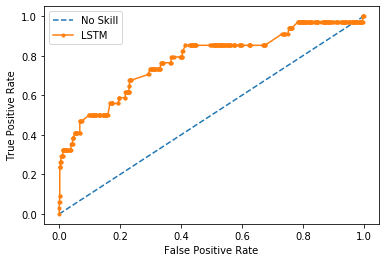

Best Threshold=0.010729, G-Mean=0.721


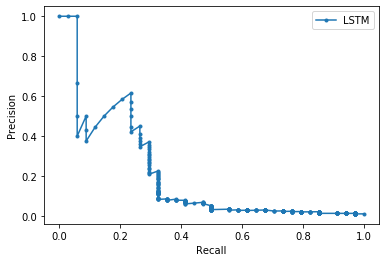

Best Threshold=0.563743, F-Score=0.340
[[3261    5]
 [  27    7]]
Accuracy 0.9903030303030304
Recall 0.20588235294117646
Precision 0.5833333333333334


In [11]:
# predict probabilities
yhat = model.predict(X_test)

# calculate roc curves
fpr, tpr, thresholds = roc_curve(Y_test, yhat)

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='LSTM')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# show the plot
plt.show()

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))

# locate the index of the largest g-mean
ix = np.argmax(gmeans)

print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(Y_test, yhat)

# plot the roc curve for the model
#no_skill = len(y_test[y_test==1]) / len(y_test)

#plt.plot([0,1], [no_skill , no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='LSTM')

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

# Get conf matrix
y_preds = model.predict(X_test)
y_preds_ = [1 if x[0]>thresholds[ix] else 0 for x in y_preds]
print(confusion_matrix(Y_test, y_preds_))
print('Accuracy {}'.format(accuracy_score(Y_test, y_preds_)))
print('Recall {}'.format(recall_score(Y_test, y_preds_)))
print('Precision {}'.format(precision_score(Y_test, y_preds_)))

### Combined Neural Network
Separate layers by type - text, categorical, numerical

In [13]:
# Import cleaned df
df = pd.read_pickle('df_impute_label.pkl')
df  = df.head(10000)

# Specify Col types
num_cols = ['ordinal1', 'ordinal2']
str_cols = ['type' ,'sector2', 'other_cat1', 'other_cat2', 'other_cat3', 'other_cat4', 'other_cat5']
cat_cols = ['location3', 'location4', 'location5']

# Concat all strings
df['concat']= df[str_cols].agg(' '.join, axis=1)

#### Clean
# Clean concat
df['concat'] = df['concat'].apply(clean_text)

### Combine just numerical and str_cols
X = df[['ordinal1', 'ordinal2', 'concat', 'location3', 'location4', 'location5']]

for col in cat_cols:
    X = pd.concat([X,pd.get_dummies(X[col], prefix=col)],axis=1)
    
X = X.drop(columns=cat_cols)

y = df.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# X1  - text
MAX_NB_WORDS = 1000
MAX_SEQUENCE_LENGTH = 85
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(X_train.concat)

X1_train = tokenizer.texts_to_sequences(X_train.concat)
X1_test = tokenizer.texts_to_sequences(X_test.concat)

vocab_size = len(tokenizer.word_index) + 1

X1_train = pad_sequences(X1_train, padding='post', maxlen=MAX_SEQUENCE_LENGTH)
X1_test = pad_sequences(X1_test, padding='post', maxlen=MAX_SEQUENCE_LENGTH)

# X2  - num
X2_train = X_train[num_cols].values
X2_test = X_test[num_cols].values

# X3 - categorical
one_hot_cols = [z for d in [[x for x in X.columns if x.startswith(y)] for y in cat_cols] for z in d]
X3_train = X_train[one_hot_cols].values
X3_test = X_test[one_hot_cols].values

In [14]:
### Create model inputs

# TEXT
input_1 = Input(shape=(MAX_SEQUENCE_LENGTH,))
embedding_layer = Embedding(vocab_size, 100, trainable=False)(input_1)
LSTM_Layer_1 = LSTM(128)(embedding_layer)

# NUM - 2 features
input_2 = Input(shape=(2,))
dense_layer_1 = Dense(10, activation='relu')(input_2)
dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)

# CAT - 336 features
input_3 = Input(shape=(X3_test.shape[1],))
dense_layer_3 = Dense(10, activation='relu')(input_3)
dense_layer_4 = Dense(10, activation='relu')(dense_layer_3)

# CONCAT
concat_layer = Concatenate()([LSTM_Layer_1, dense_layer_2, dense_layer_4])
dense_layer_5 = Dense(10, activation='relu')(concat_layer)
output = Dense(1, activation='sigmoid')(dense_layer_5)
model = Model(inputs=[input_1, input_2, input_3], outputs=output)

# COMPILE
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
print(model.summary())

history = model.fit(x=[X1_train, X2_train, X3_train], y=y_train, batch_size=128, epochs=10, 
                    verbose=1, validation_split=0.2)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 85)           0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 2)            0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 335)          0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 85, 100)      7700        input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (D

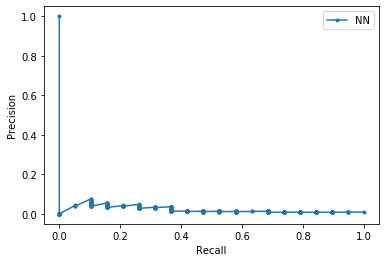

Best Threshold=0.039586, F-Score=nan


In [15]:
# Predict
yhat = model.predict([X1_test, X2_test, X3_test])
yhat = [x[0] for x in yhat]

# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(y_test, yhat)

# plot the roc curve for the model
#no_skill = len(y_test[y_test==1]) / len(y_test)

#plt.plot([0,1], [no_skill , no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='NN')

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
